# SGBD et SQL

## Qu'est-ce qu'un SGBD ?


**SGBD** est l'acronyme de **S**ystème de **G**estion de **B**ase de **D**onnées.

Un SGBD est un logiciel qui permet de créer et gérer des bases de données accessibles à un ou plusieurs utilisateurs.

Le langage utilisé dans les SGBD est le **SQL**, acronyme de **S**tructured **Q**uery **L**anguage.

Les fonctionnalités d'un SGBD sont:

- créer des bases de données, ensemble de relations (tables);
- créer des relations (tables) à partir d'un schéma relationnel;
- ajouter, modifier, supprimer des données dans les relations (tables);
- effectuer des requêtes pour interroger les relations, obtenir des données, triées ou non, respectant une ou plusieurs conditions;
- spécifier les contraintes d'intégrités : clefs primaires, clefs étrangères, domaine de valeurs;
- sécuriser et pérenniser les données ;
- gérer les droits, permissions, des utilisateurs de la base de données.

### Modèle client - serveur

Un SGBD est un logiciel installé sur un serveur. Dans ce mode de fonctionnement, l'accès aux données à plusieurs utilisateurs est possible.

Cela implique que le SGBD permette :

- de créer, supprimer des utilisateurs, gérer l'authentification (login, mot de passe) pour la connexion à une base de données;
- de gérer les permissions en lecture et écriture sur les relations de la base de données.
- de gérer les accès concurrents, c'est à dire autoriser la lecture et l'écriture des données à plusieurs utilisateurs en même temps.

Il existe de nombreux SGBD qu'on peut classer en deux catégories : libre ou propriétaire.

- Parmi les logiciels libres : MySQL, PostgreSQL, MariaDB;
- Parmi les logiciels propriétaires : ORACLE et Microsoft SQL Server

### Modèle embarqué

**SQLITE** est un SGBD qui a la particularité de s'installer sur toute plateforme en mode dit embarqué (non serveur). Cela permet de gérer des bases de données sur une machine personnelle, très utile pour le développement.

## Langage SQL 

Le langage majoritairement utilisé dans les SGBD est le SQL : Structured Query Language.

Ce langage permet de réaliser des **requêtes** sur les **relations** d'une base de données pour en extraire les données qu'elles contient.

Le langage SQL utilise des **clauses** qui permettent:

- Pour la sélection de données, on utilise la clause SELECT. Elle peut être accompagnée des clauses DISTINCT, WHERE et ORDER BY pour affiner la recherche;
- L'ajout de données dans une relation avec la clause INSERT INTO;
- La mise à jour ou la modification d'une donnée avec la clause UPDATE;
- La suppression d'un enregistrement d'une relation avec la clause DELETE.

### Remarque

- Une requête SQL se termine par un point-virgule. Dans un client en console, la saisie du point virgule déclenche la requête.
- Une requête SQL peut s'écrire sur plusieurs lignes.
- Les clause présentées ci-dessus sont des clauses importantes mais il en existe beaucoup d'autres  qui permettent de créer des relation, supprimer des relations, etc.

## Recueillir des des données

Une base de données contient des données qu'il est possible d'obtenir avec des requêtes SQL. On interroge les relations d'une base avec la clause **SELECT**. Cette clause peut être accompagnée d'autres clauses qui affinent la recherche des données dans la base.

### Clause SELECT ... FROM

La clause **SELECT ... FROM** réalise la sélection de données dans une relation:

```SQL
SELECT attribut1, attribut2,... FROM relation;
```

Cette clause peut s'accompagner de la clause **DISTINCT** qui évite la redondance des données lorsque la requête renvoie plusieurs fois les mêmes valeurs.

```SQL
SELECT DISTINCT attribut1, attribut2,... FROM relation;
```

La sélection de tous les attributs d'une table peut se faire avec l'étoile *:

```SQL
SELECT * FROM relation;
```

La sélection peut être triée avec la clause **ORDER BY**, soit par ordre croissant avec la clause **ASC** ou par ordre décroissant  avec la clause **DESC**:

```SQL
SELECT * FROM relation ORDER BY attribut ASC;
```

### Clause SELECT ... FROM ... WHERE

La clause **WHERE** impose une **condition** sur l'**attribut** à respecter dans la requête:

```SQL
SELECT attribut(s) FROM relation WHERE condition(s);
```
Il est possible d'ajouter plusieurs conditions et utiliser les opérateurs logiques **AND**, **OR** et **NOT**.

Les principaux opérateurs utilisés dans les conditions sont rassemblés dans le tableau:

|Opérateur  |Description|Syntaxe|
|:----------|:----------|:------|
|=          |égal|attribut = valeur|
|$<>$ ou != |différent|attribut <> valeur|
|$>$ et $<$ |supérieur à et inférieur à|attribut > valeur|
|$>=$ et $<=$|supérieur ou égal à et inférieur ou égal à|attribut >= valeur|
|IN|Liste de plusieurs valeurs possibles|attribut IN (valeur1,valeur2,valeur3)|
|BETWEEN|Valeur comprise dans un intervalle donné|attribut BETWEEN valeur1 AND valeur2|
|LIKE|Recherche en spécifiant le début, milieu ou fin d'un mot|attribut LIKE valeur|
|IS NULL|attribut de valeur nulle (vide)|attribut IS NULL|
|IS NOT NULL|attribut de valeur non nulle (non vide)|attribut IS NOT NULL|

### Remarques

1. Plusieurs conditions sont possibles avec les opérateurs AND et OR;
2. La négation d'une condition se fait avec NOT.
3. Le caractère % s'utilise avec l'opérateur LIKE et signifie toute chaine de caractères.    
    Par exemple, pour tous les mots qui commençent par **ch**, on note *LIKE ch%*.

### Exemples avec la clause WHERE

On considère une relation **auteur** avec les 2 attributs **nom** et **année** (de naissance).

1. On recherche les noms des auteurs nés en 1980.

```SQL
SELECT nom FROM auteur WHERE année = 1980;
```

2. On recherche les noms des auteurs nés entre 1980 et 2000

```SQL
SELECT nom FROM auteur WHERE année BETWEEN 1980 AND 2000;
```

3. On recherche les noms des auteurs qui commencent par la lettre "S"

```SQL
SELECT nom FROM auteur WHERE nom LIKE 'S%';
```

4. On recherche les noms des auteurs qui finissent par la lettre "p"

```SQL
SELECT nom FROM auteur WHERE nom LIKE '%p';
```

5. On recherche les noms des auteurs contenus dans la liste ("Rowling","Vargas")

```SQL
SELECT nom FROM auteur WHERE nom IN ("Rowling","Vargas");
```

6. On recherche les noms des auteurs qui sont vides

```SQL
SELECT nom FROM auteur WHERE nom IS NULL;
```

### Fonctions d'agrégation

Les fonctions d'agrégation permettent d'effectuer quelques statistiques sur les relations d'une base de données. Les principales fonctions sont les suivantes :

- AVG() pour calculer la moyenne des valeurs d'un attribut;
- COUNT() pour compter le nombre d'enregistrements sur une table ou un un attribut précisé;
- MAX() pour récupérer la valeur maximum d'un attribut sur un ensemble de ligne. Cela s'applique à la fois pour des données numériques ou alphanumériques;
- MIN() pour récupérer la valeur minimum de la même manière que MAX();
- SUM() pour calculer la somme de valeurs sur un ensemble d'enregistrements.

Ces fonctions se placent juste après la clause SELECT. La requête peut être soumise à condition(s) mais non obligatoire.

```SQL
SELECT Fonction agrégation FROM relation WHERE condition(s);
```

## Insérer des données

La clause **INSERT INTO ... VALUES ...** ajoute un enregistrement (tuple) à une relation. Il faut indiquer le nom de la relation en précisant les attributs, entre parenthèses, et indiquer les valeurs à ajouter entre parenthèses.

```SQL
INSERT INTO relation (attribut1, attribut2, ...) VALUES (valeur1, valeur2, ...);
```

Dans la même requête, il est possible d'ajouter plusieurs nouveaux enregistrements séparés par des virgules.

### Exemples avec la clause INSERT INTO

On considère la relation **auteur** contenant les attributs **nom**, **année** et la clef primaire **id_auteur**.

1. Insertion de l'auteur "Rowling" née en 1965 :

    ```SQL
    INSERT INTO auteur (id_auteur, nom, année) VALUES (24,"Rowling", 1965);
    ```

2. Insertion des auteurs J. R. R. "Tolkien" né en 1892 et George R. R. "Martin" né en 1948:

    ```SQL
    INSERT INTO auteur (id_auteur, nom, année) 
    VALUES (25,"Tolkien", 1892), (26,"Martin", 1948);
    ```

### Remarques

1. Il n'est pas obligatoire de préciser les attributs mais il faut bien veiller à mettre les valeurs dans l'ordre des attributs de la relation.
2. On peut mettre les attributs dans un ordre différent en prenant soin de mettre les valeurs dans le même ordre.

## Mettre à jour un enregistrement d'une relation

La clause **UPDATE** permet de mettre à jour une relation en modifiant des valeurs. La requête doit préciser l'attribut à modifier avec sa nouvelle valeur et le même attribut avec son ancienne valeur sous la forme d'une condition.

La syntaxe est la suivante:

```SQL
UPDATE relation SET attribut = nouvelle valeur WHERE attribut = ancienne valeur;
```

La condition n'est pas nécessairement une égalité stricte. Si la condition renvoie plusieurs enregistrements, ils seront tous mis à jour avec la nouvelle valeur.


### Exemple de requête de mise à jour

On conserve la relation auteur pour laquelle on souhaite modifiée une année de naissance.

```SQL
UPDATE auteur SET année = 2001 WHERE nom="Rowling";
```

## Supprimer un enregistrement d'une relation

La clause **DELETE FROM** supprime un enregistrement. Cette clause s'accompagne d'une condition pour déterminer les enregistrements à supprimer. La requête SQL est exécutée sans demande de confirmation.

La syntaxe est la suivante:

```SQL
DELETE FROM relation WHERE condition(s);
```

### Exemple de suppression

On conserve la relation auteur pour laquelle on souhaite modifiée une année de naissance.

```SQL
DELETE FROM auteur WHERE nom="Rowling";
```

### Remarque

Si la clause **WHERE** n'est pas donnée dans un **DELETE**, alors tous les enregistrements de la relation sont supprimés.

## Les jointures

Les données à recueillir peuvent se situées dans des relations différentes. Pour les obtenir, il est donc nécessaire de joindre les relations.

La clause JOIN permet de rassembler deux ou plusieurs relations à l'aide des **clefs étrangères**.

La syntaxe est la suivante pour effectuer une jointure:

```SQL
SELECT attribut(s) FROM relation1
JOIN relation2 ON relation1.clef_etrangere = relation2.clef_primaire;
```

Il est possible de joindre plusieurs relations:

```SQL
SELECT attribut(s) FROM relation1
JOIN relation2 ON relation1.clef_etrangere = relation2.clef_primaire
JOIN relation3 ON relation2.clef_etrangere = relation3.clef_primaire;
```

### Remarques

1. Les attributs appartiennent aux relations jointes et pas seulement la première relation indiquée.
2. Il est important de repérer les clefs étrangères pour les relier aux clefs primaires correspondantes.
3. Si les clefs étrangères et primaires n'ont pas le même nom, il n'est pas utile de les préfixer par le nom des relations.
4. On peut également ajouter la clause WHERE aux clauses JOIN.

### Exemple de jointure

On considère la base de données selon le modèle relationnel suivant:

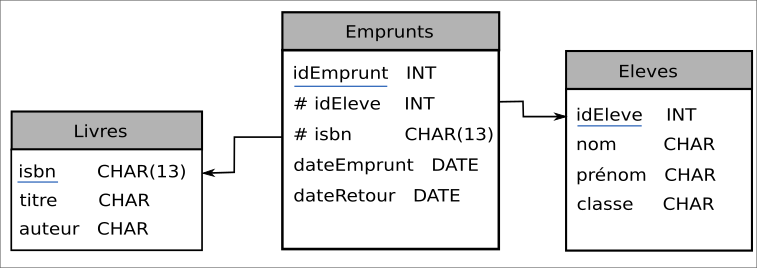

1. On souhaite recueillir les titres des livres et les dates d'emprunts. Ces données sont dans deux relations différentes. Heuresement la table **Emprunts** dispose d'une clef étrangère la reliant à la relation **Livres**.

    On réalise donc une jointure entre les tables**Livres** et **Emprunts**.

    ```SQL
    SELECT titre, dateEmprunt FROM Livres
    JOIN Emprunts ON Livres.isbn = Emprunt.isbn;
    ```

2. On peut soumettre cette recherche aux livres empruntés avant une date donnée.

    ```SQL
    SELECT titre, dateEmprunt FROM Livres
    JOIN Emprunts ON Livres.isbn = Emprunt.isbn
    WHERE dateEmprunt < 10012022;
    ```

3. On veut récupérer les noms des élèves qui n'ont pas encore rendu les livres empruntés. Il faut joindre la troisième relation **Eleves** avec la clef étrangère **idEleve**.

    ```SQL
    SELECT titre, dateEmprunt FROM Livres
    JOIN Emprunts ON Livres.isbn = Emprunt.isbn
    JOIN Eleves ON Eleves.idEleve = Livres.idEleve
    WHERE dateEmprunt < 10012022;
    ```